---
title: "DEDL-HDA-MTG"
subtitle: "This notebook demonstrates how to search, download and raed dta using HDA an satpy."
author: "Serena Avolio (EUMETSAT/Starion)"
tags: [HDA, satpy]
thumbnail: ../../img/EUMETSAT-icon.png
license: MIT
copyright: "© 2025 EUMETSAT"
---
<div style="margin: 6px 0;">
  <a href="https://jupyter.central.data.destination-earth.eu/user-redirect/lab/tree/DestinE-DataLake-Lab/HDA/EUM_data/DEDL-HDA-EO.EUM.DAT.SENTINEL-3.OL_1_ERR___.ipynb" target="_blank" style="text-decoration: none;">
    <span class="launch">🚀 Launch in JupyterHub</span>
  </a>
</div>

# Authenticate

In [1]:
import destinelab as deauth

In [2]:
import requests
import json
import os
import zipfile
import datetime
import shutil
from getpass import getpass

In [3]:
DESP_USERNAME = input("Please input your DESP username or email: ")
DESP_PASSWORD = getpass("Please input your DESP password: ")

auth = deauth.AuthHandler(DESP_USERNAME, DESP_PASSWORD)
access_token = auth.get_token()
if access_token is not None:
    print("DEDL/DESP Access Token Obtained Successfully")
else:
    print("Failed to Obtain DEDL/DESP Access Token")

auth_headers = {"Authorization": f"Bearer {access_token}"}

Please input your DESP username or email:  serena.avolio
Please input your DESP password:  ········


Response code: 200
DEDL/DESP Access Token Obtained Successfully


#  Search

## HDA endpoint
HDA API is based on the Spatio Temporal Asset Catalog specification (STAC), it is convenient define a costant with its endpoint.

In [4]:
HDA_STAC_ENDPOINT="https://hda.data.destination-earth.eu/stac/v2"

In [5]:
#COLLECTION_ID = "EO.EUM.DAT.MTG.FCI-CLM"
COLLECTION_ID = "EO.EUM.DAT.MTG.FCI-HRFI"

In [6]:
response = requests.post(HDA_STAC_ENDPOINT+"/search", headers=auth_headers, json={
    "collections": [COLLECTION_ID],
    "datetime": "2025-08-06T08:00:00Z/2025-08-07T00:00:00Z"
})
if(response.status_code!= 200):
    (print(response.text))
response.raise_for_status()

In [7]:
from IPython.display import JSON

product = response.json()["features"][0]
JSON(product)

<IPython.core.display.JSON object>

# Download

In [8]:
from tqdm import tqdm
import time

# Define a list of assets to download
#assets = ["Oa08_radiance.nc", "Oa06_radiance.nc", "Oa02_radiance.nc"]
assets = ["downloadLink"]

for asset in assets:
    download_url = product["assets"][asset]["href"]
    print(download_url)
    filename = asset
    print(filename)
    response = requests.get(download_url, headers=auth_headers)
    total_size = int(response.headers.get("content-length", 0))

    print(f"downloading {filename}")

    with tqdm(total=total_size, unit="B", unit_scale=True) as progress_bar:
        with open(filename, 'wb') as f:
            for data in response.iter_content(1024):
                progress_bar.update(len(data))
                f.write(data)

https://hda-download.lumi.data.destination-earth.eu/data/eumetsat/EO.EUM.DAT.MTG.FCI-HRFI/W_XX-EUMETSAT-Darmstadt%2CIMG%2BSAT%2CMTI1%2BFCI-1C-RRAD-HRFI-FD--x-x---x_C_EUMT_20250806080343_IDPFI_OPE_20250806080007_20250806080935_N__O_0049_0000/downloadLink
downloadLink
downloading downloadLink


951MB [00:10, 91.2MB/s]


In [9]:
zf=zipfile.ZipFile(filename)
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall('.')

# Satpy

The Python package satpy supports reading and loading data from many input files. 
For MSG data and the Native format, we can use the satpy reader 'seviri_l1b_native.

In [10]:
pip install --quiet satpy

Note: you may need to restart the kernel to use updated packages.


Import required libraries

In [11]:
from packaging.version import Version
import satpy
from satpy.scene import Scene

print(satpy.__version__)
if Version(satpy.__version__) < Version("0.57"):
    from satpy.composites import GenericCompositor
    from satpy.writers import to_image
    from satpy.resample import get_area_def
elif Version(satpy.__version__) == Version("0.57"):
    from satpy.composites import GenericCompositor
    from satpy.area import get_area_def
else:
    from satpy.composites.core import GenericCompositor
    from satpy.area import get_area_def
from satpy import available_readers

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

0.59.0


### Read and load data

We use the Scene constructor from the satpy library, a Scene object represents a single geographic region of data.
Once loaded we can list all the available bands (spectral channel) for that scene.

In [12]:
# define path to FCI test data folder
path_to_data = './'
from satpy import find_files_and_readers

from satpy import available_readers



In [13]:
files = find_files_and_readers(base_dir=path_to_data, reader='fci_l1c_nc')

In [14]:
scn = Scene(filenames=files)

In [15]:
scn.available_dataset_names()

['ir_105',
 'ir_105_earth_sun_distance',
 'ir_105_index_map',
 'ir_105_pixel_quality',
 'ir_105_platform_altitude',
 'ir_105_subsatellite_latitude',
 'ir_105_subsatellite_longitude',
 'ir_105_subsolar_latitude',
 'ir_105_subsolar_longitude',
 'ir_105_sun_satellite_distance',
 'ir_105_swath_direction',
 'ir_105_swath_number',
 'ir_105_time',
 'ir_38',
 'ir_38_earth_sun_distance',
 'ir_38_index_map',
 'ir_38_pixel_quality',
 'ir_38_platform_altitude',
 'ir_38_subsatellite_latitude',
 'ir_38_subsatellite_longitude',
 'ir_38_subsolar_latitude',
 'ir_38_subsolar_longitude',
 'ir_38_sun_satellite_distance',
 'ir_38_swath_direction',
 'ir_38_swath_number',
 'ir_38_time',
 'nir_22',
 'nir_22_earth_sun_distance',
 'nir_22_index_map',
 'nir_22_pixel_quality',
 'nir_22_platform_altitude',
 'nir_22_subsatellite_latitude',
 'nir_22_subsatellite_longitude',
 'nir_22_subsolar_latitude',
 'nir_22_subsolar_longitude',
 'nir_22_sun_satellite_distance',
 'nir_22_swath_direction',
 'nir_22_swath_number',


In [16]:
scn.available_composite_names()

['colorized_ir_clouds',
 'fci_fire_channels_sum',
 'flames_masked',
 'geo_color_background_with_low_clouds',
 'geo_color_high_clouds',
 'geo_color_low_clouds',
 'geo_color_night',
 'hrv_clouds',
 'ir108_3d',
 'ir_cloud_day',
 'ir_sandwich',
 'ir_sandwich_with_night_colorized_ir_clouds',
 'night_ir105',
 'simple_fci_fire_mask']

In [17]:
scn.load(['night_ir105','vis_06'], upper_right_corner='NE')

In [18]:
vis_06_values = scn['vis_06'].values

In [19]:
scn_resampled = scn.resample("eurol", resampler='nearest', radius_of_influence=5000)

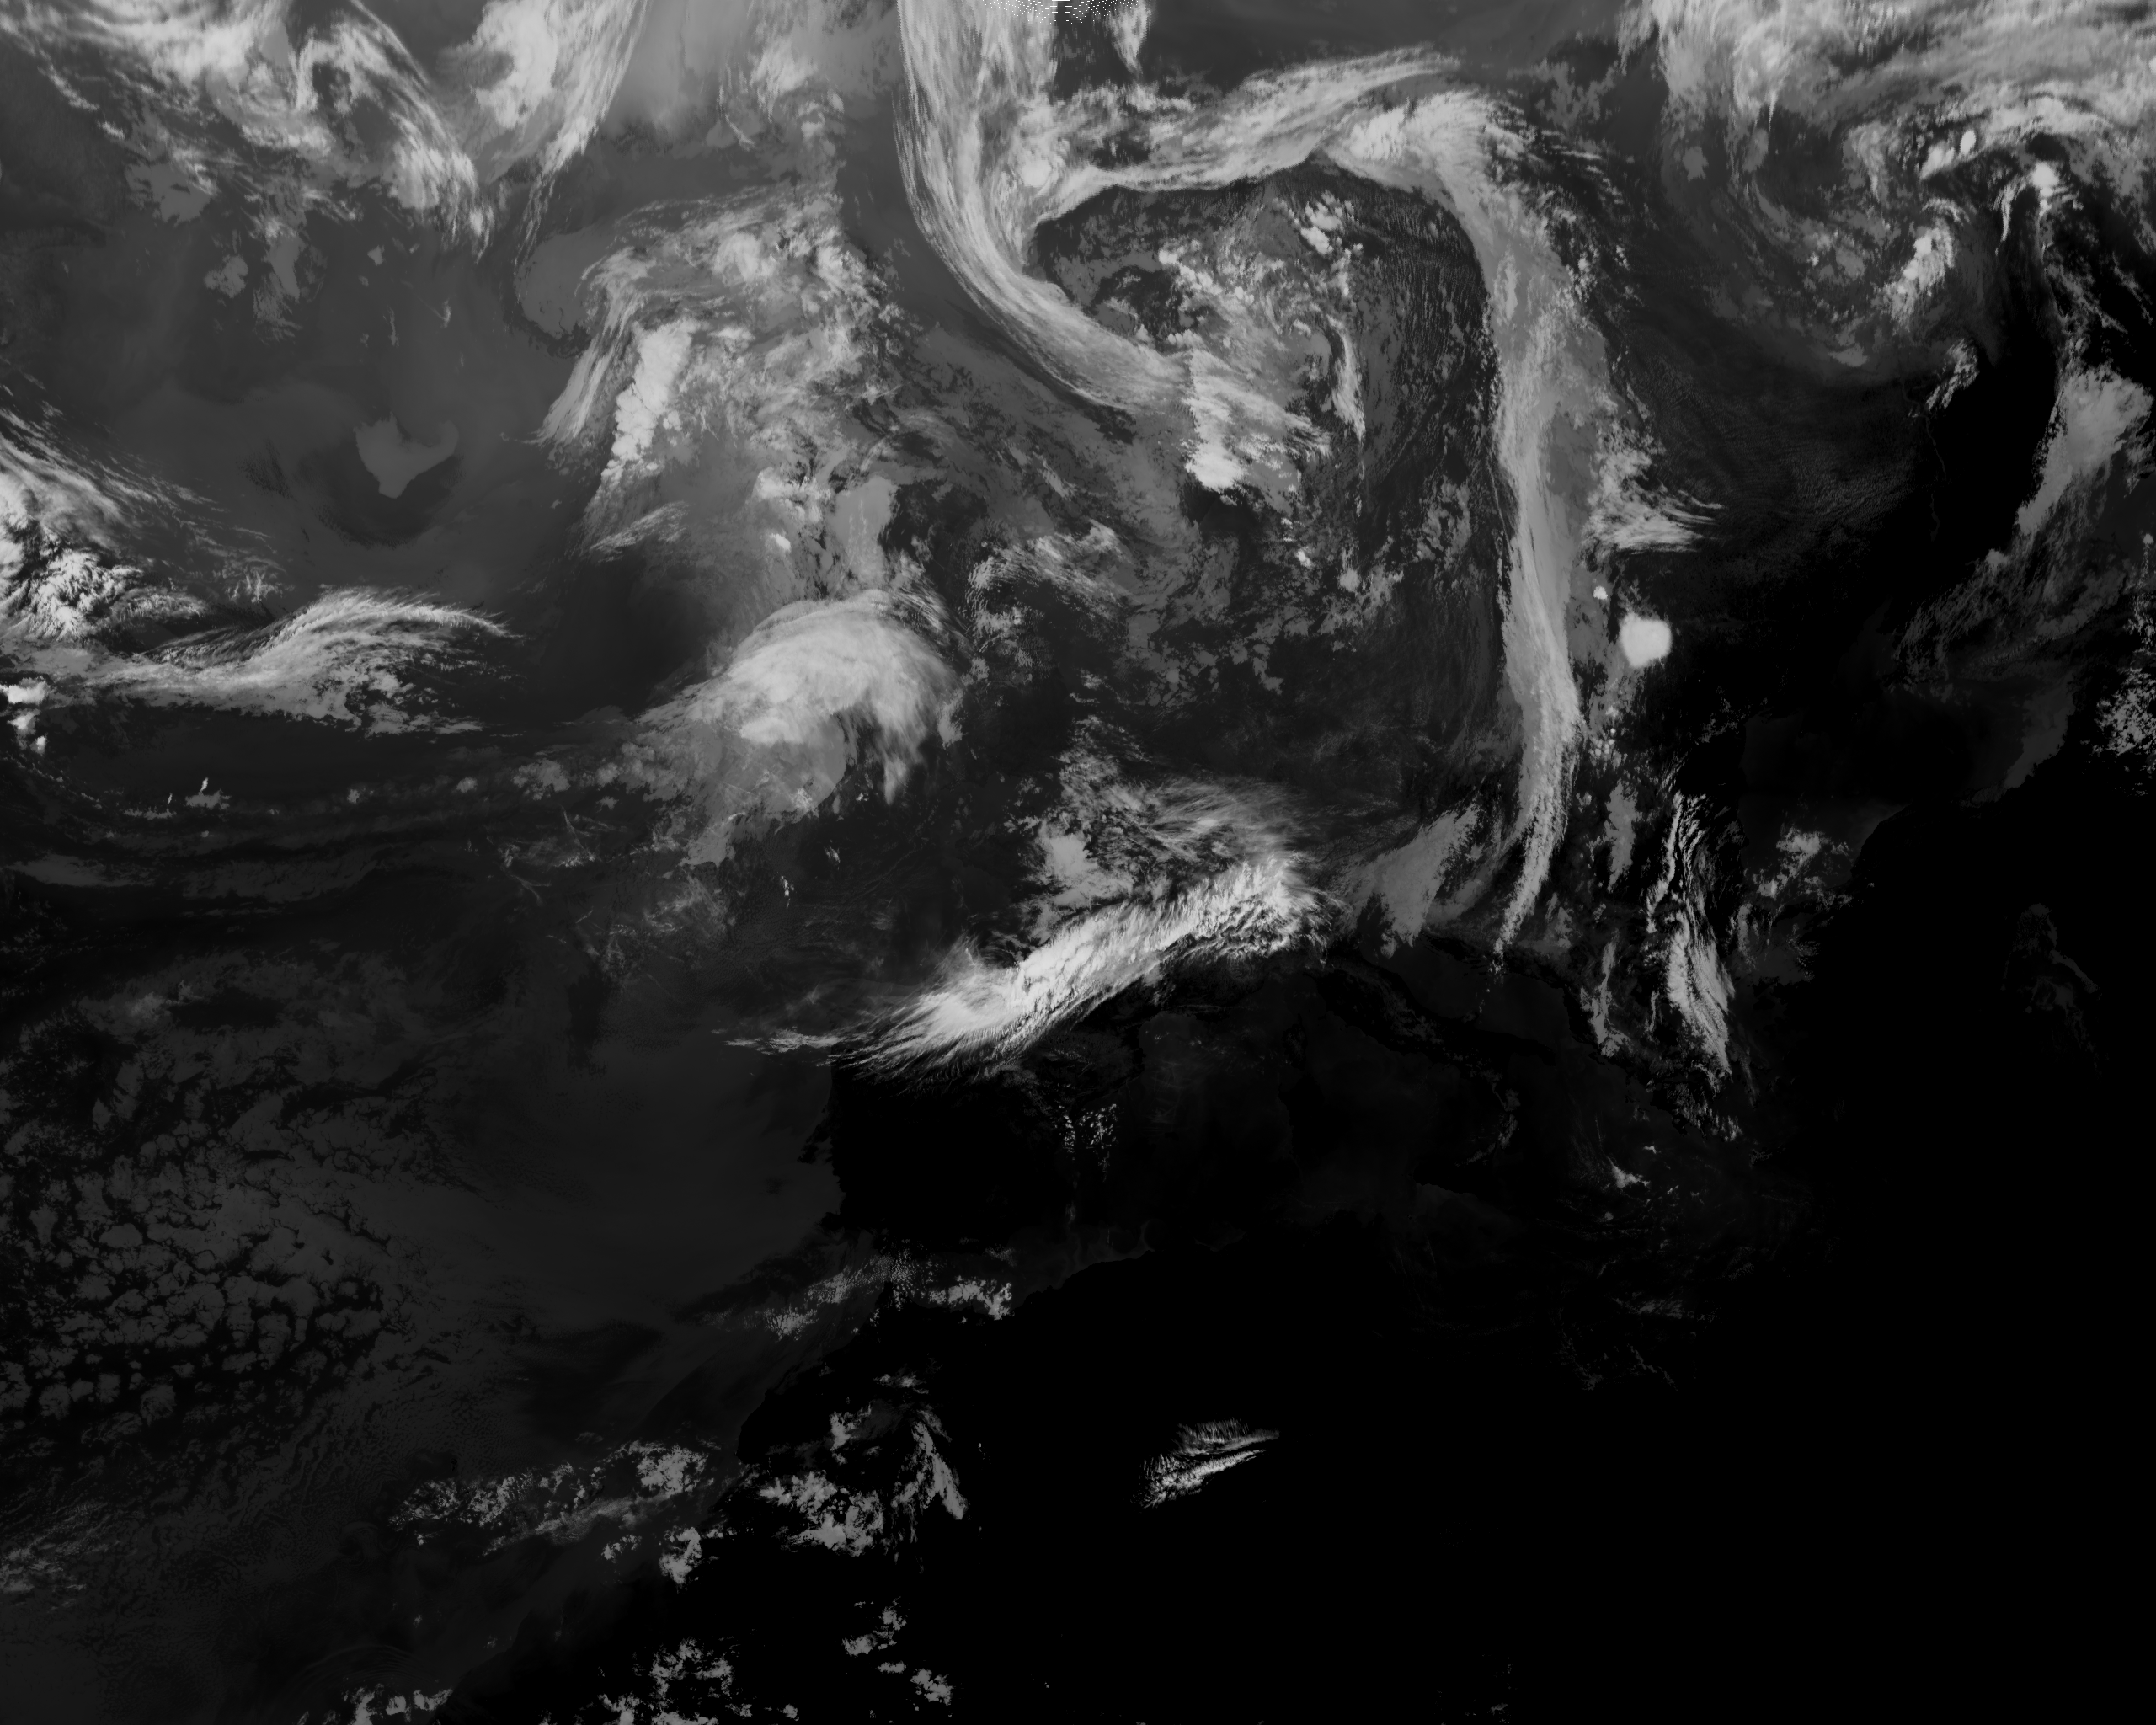

In [20]:
scn_resampled.show('night_ir105')